## 1. Import libraries and Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('Retail Customer Analytics Assignment1.csv', encoding = 'utf-8', sep = '\t')

/Users/yapinghuang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.head()

,Customer_ID,CategoryGroup,Category,InvoiceDate,Quantity,TotalPrice
0,15550,Games & Toys,Games & Toys,1/1/2020,1,£8
1,15550,Bags & Purses,Jumbo Bag,1/1/2020,1,£2
2,15550,Decorations,Doilies,1/1/2020,1,£1
3,15550,Bags & Purses,Purse,1/1/2020,2,£3
4,15550,Bags & Purses,Purse,1/1/2020,2,£3


In [7]:
df.dtypes

Customer_ID       int64
CategoryGroup    object
Category         object
InvoiceDate      object
Quantity         object
TotalPrice       object
dtype: object

In [8]:
df.columns

Index(['Customer_ID', 'CategoryGroup', 'Category', 'InvoiceDate', 'Quantity',
       'TotalPrice'],
      dtype='object')

##  2. Transform Datatype
- change InvoiceDate from String to date format
- change Total Price and Quantity from String to Integer

In [9]:
df['InvoiceDate'] = df['InvoiceDate'].apply(pd.to_datetime)

In [10]:
# df.Quantity.astype(int)
df['TotalPrice'] = df.TotalPrice.apply(lambda x:x.replace("£","")).apply(lambda x:x.replace(",", ""))

In [11]:
df['TotalPrice'] = df['TotalPrice'].apply(pd.to_numeric)

In [12]:
df.dtypes

Customer_ID               int64
CategoryGroup            object
Category                 object
InvoiceDate      datetime64[ns]
Quantity                 object
TotalPrice                int64
dtype: object

In [13]:
new_df = df.replace("1,008", "1008")

In [14]:
new_df = new_df.replace("1,200", "1200")

In [15]:
new_df = new_df.replace("1,000", "1000")

In [16]:
new_df = new_df.replace("1,500", "1500")

In [17]:
new_df['Quantity'] = new_df['Quantity'].apply(pd.to_numeric)

In [18]:
new_df.dtypes

Customer_ID               int64
CategoryGroup            object
Category                 object
InvoiceDate      datetime64[ns]
Quantity                  int64
TotalPrice                int64
dtype: object

In [19]:
new_df["Total Sales"] = new_df["Quantity"]*df['TotalPrice']

In [20]:
new_df.head()

,Customer_ID,CategoryGroup,Category,InvoiceDate,Quantity,TotalPrice,Total Sales
0,15550,Games & Toys,Games & Toys,2020-01-01,1,8,8
1,15550,Bags & Purses,Jumbo Bag,2020-01-01,1,2,2
2,15550,Decorations,Doilies,2020-01-01,1,1,1
3,15550,Bags & Purses,Purse,2020-01-01,2,3,6
4,15550,Bags & Purses,Purse,2020-01-01,2,3,6


In [21]:
new_df.to_csv("Retail Customer Analytics Cleaned data.csv")

In [22]:
new_df.groupby("CategoryGroup", as_index=False)['Total Sales'].sum()

,CategoryGroup,Total Sales
0,Accessories,1770872
1,Arts & Crafts,3727624
2,Bags & Purses,16921762
3,Bathroom,2041993
4,Beauty & Wellbeing,1575397
5,Candles,13117961
6,Car & Bicycle,67466
7,Children,1612797
8,Christmas,7018183
9,Cleaning & Laundry,597151


## 3. Group customers data into: monetary, frequecy and recency

In [348]:
df1 = pd.DataFrame(new_df.groupby("Customer_ID", as_index=False)["InvoiceDate"].max()).rename(
    columns={"InvoiceDate":"Recency"})

In [349]:
from datetime import date

In [350]:
date.today()

datetime.date(2022, 9, 24)

In [351]:
df1['Recency'][1].date()

datetime.date(2021, 10, 19)

In [352]:
date.today()-df1['Recency'][1].date()

datetime.timedelta(days=340)

In [354]:
df1["Recency"] = df1['Recency'].apply(lambda x:(date.today()-x.date())).dt.days

In [356]:
df2 = pd.DataFrame(new_df.groupby("Customer_ID",as_index=False)["Total Sales"].sum()).rename(
    columns={"Total Sales":"Monetary"})

In [357]:
df3 = pd.DataFrame(new_df.groupby("Customer_ID", as_index=False)['Total Sales'].count()).rename(
    columns={"Total Sales":"Frequency"})

In [358]:
df_rfm = pd.merge(pd.merge(df1, df2), df3)

In [359]:
df_rfm.dtypes

Customer_ID    int64
Recency        int64
Monetary       int64
Frequency      int64
dtype: object

In [375]:
df_rfm.describe()

,Customer_ID,Recency,Monetary,Frequency
count,5010.000000,5010.000000,5.010000e+03,5010.000000
mean,15347.613772,526.811178,2.431409e+04,79.019561
std,1705.446674,197.146086,8.572177e+04,99.242914
min,12348.000000,322.000000,4.000000e+00,1.000000
25%,13869.000000,353.000000,2.825750e+03,19.000000
50%,15360.500000,442.000000,7.737000e+03,44.000000
75%,16818.750000,703.000000,2.106525e+04,99.000000
max,18287.000000,997.000000,4.035269e+06,996.000000


## 4. Exploratory Data Analysis with Seaborn

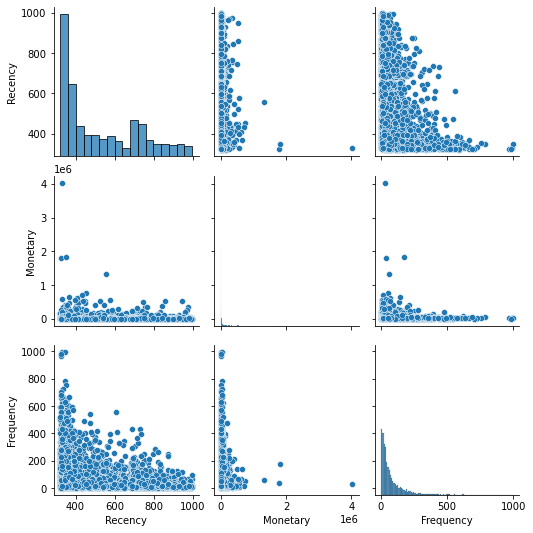

In [382]:
sns.pairplot(df_rfm.drop("Customer_ID", axis=1))

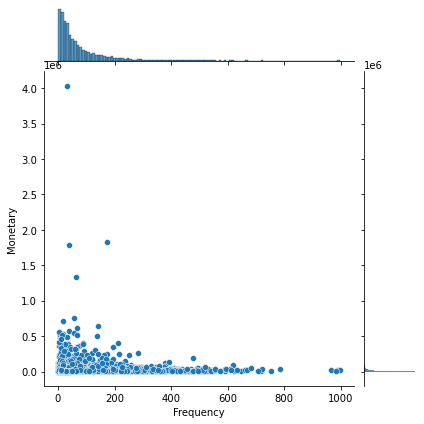

In [369]:
sns.jointplot(data=df_rfm, x="Frequency", y="Monetary")

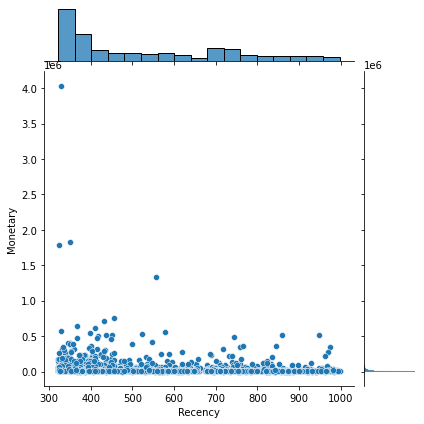

In [370]:
sns.jointplot(data=df_rfm, x="Recency", y="Monetary")

## 5. K-Mean Clustering

In [360]:
from sklearn.cluster import KMeans

In [361]:
kmeans = KMeans(n_clusters=5)

In [362]:
kmeans.fit(df_rfm.drop("Customer_ID", axis=1))

KMeans(n_clusters=5)

Text(0, 0.5, 'Monetary')

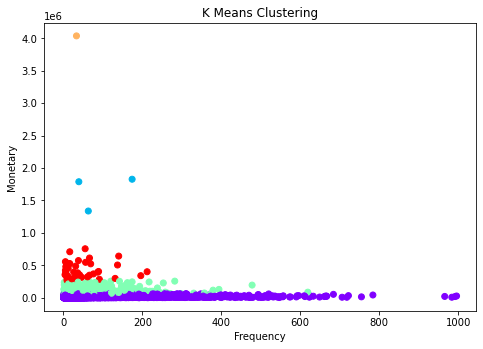

In [367]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])

axes.set_title('K Means Clustering')
axes.scatter(df_rfm['Frequency'],df_rfm['Monetary'],c=kmeans.labels_,cmap='rainbow')

axes.set_xlabel('Frequency') 
axes.set_ylabel('Monetary')


Text(0, 0.5, 'Monetary')

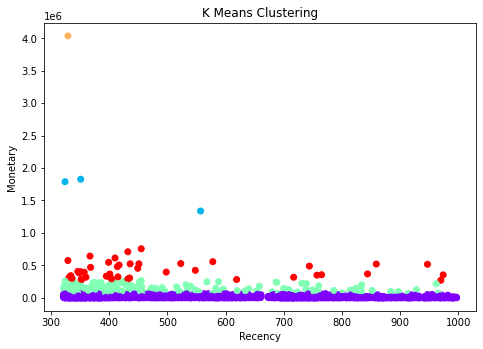

In [373]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])

axes.set_title('K Means Clustering')
axes.scatter(df_rfm['Recency'],df_rfm['Monetary'],c=kmeans.labels_,cmap='rainbow')

axes.set_xlabel('Recency') 
axes.set_ylabel('Monetary')